In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random,time



a1 = random.random()*2 -1
a2 = random.random()*2 -1
b1 = random.random()*2 -1
b2 = random.random()*2 -1


norm = (a1**2 + a2**2 + b1**2 + b2**2 )**0.5

c1 = complex(a1/norm,a2/norm)
c2 = complex(b1/norm,b2/norm)


psi = QuantumRegister(1, name ='psi')
bell = QuantumRegister(2, name ='bell')
c = ClassicalRegister(2, name = 'c')


teleport = QuantumCircuit(psi,bell,c)
teleport.initialize([c1,c2], psi)
teleport.barrier()

print("Alice's Qubit is:")
print(c1,"|0> + ",c2,"|1>")

Alice's Qubit is:
(0.6085822499749879-0.004721979226887144j) |0> +  (0.6175345793295725+0.4982533404401922j) |1>


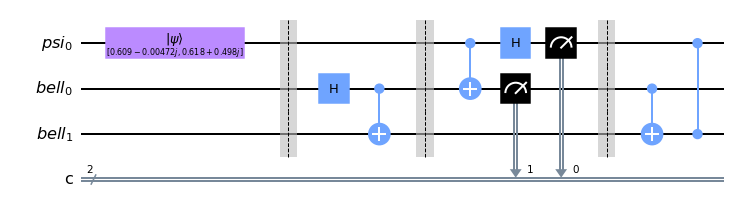

In [3]:
teleport.h(bell[0])
teleport.cx(bell[0], bell[1])
teleport.barrier()



teleport.cx(psi,bell[0])
teleport.h(psi)
teleport.measure([psi[0], bell[0]], c)
teleport.barrier()



teleport.cx(bell[0], bell[1])
teleport.cz(psi, bell[1])

teleport.draw(output='mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')
job = execute(teleport, backend)
outputstate = job.result().get_statevector()
print(outputstate)

[0.        +0.j         0.60858225-0.00472198j 0.        +0.j
 0.        +0.j         0.        +0.j         0.61753458+0.49825334j
 0.        +0.j         0.        +0.j        ]


Alice wants to send  1 1


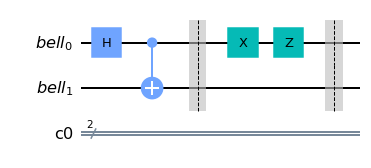

In [5]:
bell = QuantumRegister(2, name = 'bell')
c = ClassicalRegister(2)
dense = QuantumCircuit(bell,c)
dense.h(bell[0])
dense.cx(bell[0], bell[1])
dense.barrier()


b1 = random.randint(0,1)
b2 = random.randint(0,1)

print("Alice wants to send ",b1,b2)


if(b2==1):
    dense.x(bell[0])
if(b1==1):
    dense.z(bell[0])
    
dense.barrier()

dense.draw(output='mpl')

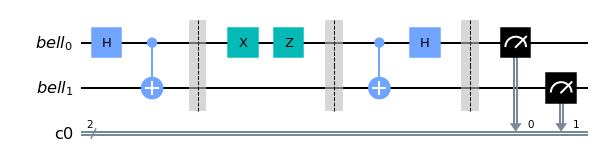

In [6]:
dense.cx(bell[0],bell[1])
dense.h(bell[0])
dense.barrier()
dense.measure(bell,c)
dense.draw(output='mpl')

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(dense, backend, shots = 1, memory = True)
result = job.result().get_memory()
print("Bob has received ",int(result[0][1]), int(result[0][0]))


Bob has received  1 1
